# Synthetic test example

In [1]:
import logging
from lisa.utils import setup_logging
setup_logging()

2018-12-12 18:38:18,902 INFO    : root         : Using LISA logging configuration:
2018-12-12 18:38:18,903 INFO    : root         :   /data/work/lisa/logging.conf


# Target configuration

In [2]:
from lisa.env import TestEnv, TargetConf

2018-12-12 18:38:18,924 INFO    : root         : Generating grammar tables from /usr/lib/python3.5/lib2to3/Grammar.txt
2018-12-12 18:38:18,948 INFO    : root         : Generating grammar tables from /usr/lib/python3.5/lib2to3/PatternGrammar.txt


In [3]:
# This is information only relevant to create a
# connection between the host and the target
target_conf = TargetConf({
    "kind" : "linux",
    "name" : "hikey960",
    "host": "192.168.0.1",
    "username" : "root",
    "password" : "root",
})

In [4]:
te = TestEnv(target_conf)
target = te.target

2018-12-12 18:38:19,652 INFO    : lisa.env.TestEnv : Target configuration:
|- username from user (str): root
|- host from user (str): 192.168.0.1
|- password from user (str): root
|- name from user (str): hikey960
|- kind from user (str): linux
+- devlib:
    +- platform:
        |- class from default (str): devlib.platform.Platform
+- ftrace:
    |- buffsize from default (int): 10240
2018-12-12 18:38:19,725 INFO    : lisa.env.TestEnv : User-defined platform information:
|- name from target-conf (str): hikey960
2018-12-12 18:38:19,760 INFO    : lisa.env.TestEnv : linux hikey960 target connection settings:
2018-12-12 18:38:19,761 INFO    : lisa.env.TestEnv :   username : root
2018-12-12 18:38:19,763 INFO    : lisa.env.TestEnv :       host : 192.168.0.1
2018-12-12 18:38:19,764 INFO    : lisa.env.TestEnv :   password : root
2018-12-12 18:38:19,765 INFO    : lisa.env.TestEnv :       port : 22
2018-12-12 18:38:19,785 INFO    : lisa.env.TestEnv : Devlib modules to load: bl, cgroups, cpufreq,

# Live target experimentation

In [5]:
from lisa.tests.scheduler.eas_behaviour import EnergyModelWakeMigration

We want to create a TestBundle from a live target, so we can use the **from_testenv** alternative constructor:

In [6]:
bundle = EnergyModelWakeMigration.from_testenv(te)

2018-12-12 18:38:39,051 INFO    : lisa.env.TestEnv : Creating result directory: /data/work/lisa/results/hikey960-20181212_183819.652020/EnergyModelWakeMigration-20181212_183839.050944
2018-12-12 18:38:56,399 INFO    : lisa.env.TestEnv : Creating result directory: /data/work/lisa/results/hikey960-20181212_183819.652020/rta_calib-20181212_183856.399063
2018-12-12 18:38:56,561 INFO    : lisa.wlgen.rta.RTA : CPU0 calibration...
2018-12-12 18:38:56,881 INFO    : lisa.wlgen.rta.RTA : Calibration value: CPU0
2018-12-12 18:38:56,883 INFO    : lisa.wlgen.rta.RTA : Default policy: SCHED_OTHER
2018-12-12 18:38:56,884 INFO    : lisa.wlgen.rta.RTA : ------------------------
2018-12-12 18:38:56,885 INFO    : lisa.wlgen.rta.RTA : task [task1], sched: using default policy
2018-12-12 18:38:56,886 INFO    : lisa.wlgen.rta.RTA :  | start delay: 0.000000 [s]
2018-12-12 18:38:56,887 INFO    : lisa.wlgen.rta.RTA :  | loops count: 1
2018-12-12 18:38:56,888 INFO    : lisa.wlgen.rta.RTA :  + phase_000001
2018-

2018-12-12 18:39:57,432 INFO    : lisa.wlgen.rta.RTA : ------------------------
2018-12-12 18:39:57,433 INFO    : lisa.wlgen.rta.RTA : task [emwm_2], sched: using default policy
2018-12-12 18:39:57,435 INFO    : lisa.wlgen.rta.RTA :  | start delay: 0.000000 [s]
2018-12-12 18:39:57,436 INFO    : lisa.wlgen.rta.RTA :  | loops count: 2
2018-12-12 18:39:57,437 INFO    : lisa.wlgen.rta.RTA :  + phase_000001
2018-12-12 18:39:57,438 INFO    : lisa.wlgen.rta.Phase :  | duration 2.000000 [s] (125 loops)
2018-12-12 18:39:57,439 INFO    : lisa.wlgen.rta.Phase :  |  period    16000 [us], duty_cycle   9 %
2018-12-12 18:39:57,441 INFO    : lisa.wlgen.rta.Phase :  |  run_time   1440 [us], sleep_time  14560 [us]
2018-12-12 18:39:57,441 INFO    : lisa.wlgen.rta.RTA :  + phase_000002
2018-12-12 18:39:57,443 INFO    : lisa.wlgen.rta.Phase :  | duration 2.000000 [s] (125 loops)
2018-12-12 18:39:57,444 INFO    : lisa.wlgen.rta.Phase :  |  period    16000 [us], duty_cycle  70 %
2018-12-12 18:39:57,445 INFO 

We now have a **TestBundle** instance. We're free to play around with its data, more specifically to execute some tests related to this data:

In [7]:
print(bundle.test_slack())

PASSED: emwm_0 slack=2.8 %, emwm_2 slack=6.8 %, emwm_1 slack=2.8 %, emwm_3 slack=1.0 %


Whenever possible, we want to expose test margins to the end user. Here, we can change the failure threshold, and for the sake of demonstration we'll set it way too low (and expect a failure)

In [8]:
print(bundle.test_slack(negative_slack_allowed_pct=1))

FAILED: emwm_0 slack=2.8 %, emwm_2 slack=6.8 %, emwm_1 slack=2.8 %, emwm_3 slack=1.0 %


This test also produces a plot, let's run it and have a look

In [9]:
print(bundle.test_task_placement())

PASSED: estimated energy=10123.446619136426 bogo-joules, energy threshold=12697.384476751002 bogo-joules


In [10]:
from trappy.plotter import plot_trace

In [11]:
plot_trace(bundle.trace.ftrace, execnames=list(bundle.rtapp_profile.keys()))

In [12]:
import os
from IPython.display import Image

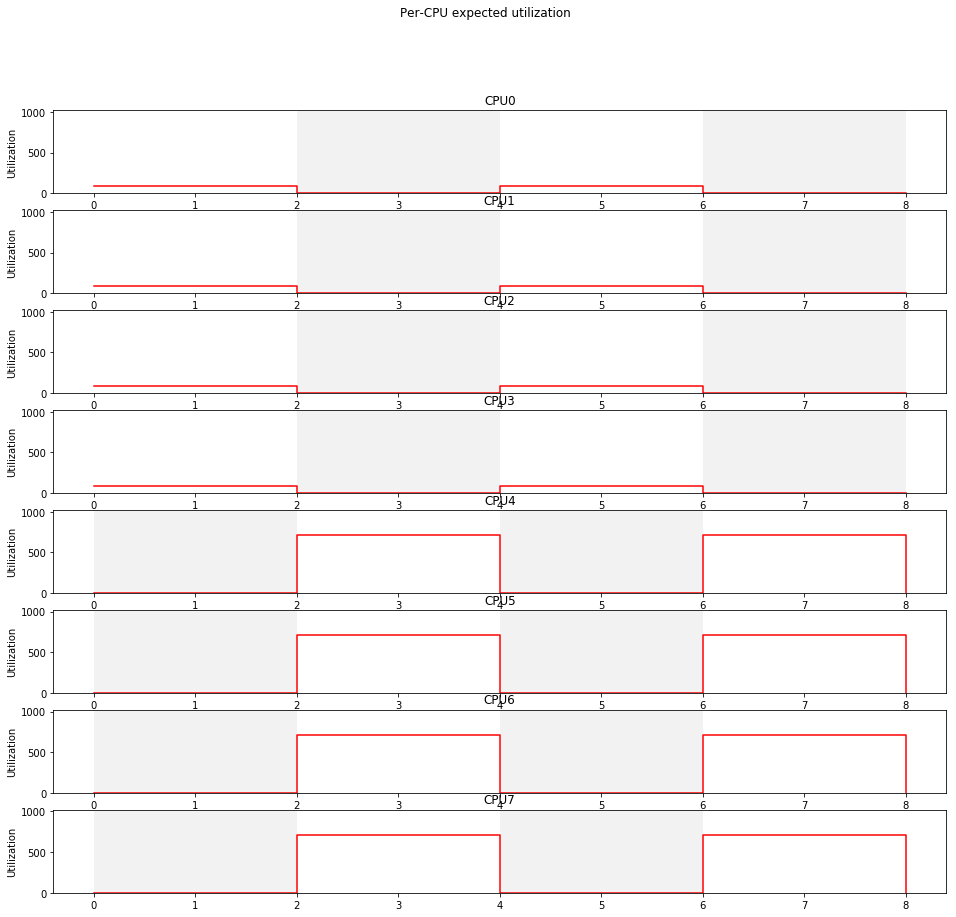

In [13]:
image_path = os.path.join(bundle.res_dir, "expected_placement.png")
Image(image_path)

# Offline replaying

Say someone executed some tests, and ran into some issues. They can create an archive of the results directory and send it your way, and you'll be able to reload it automagically. This also works if you are working on the test code itself, and don't want to re-execute the workload every single time you change the code.

In [14]:
# Let's just reuse what was generated in the previous run
archive_dir = bundle.res_dir

In [15]:
reloaded_bundle = EnergyModelWakeMigration.from_dir(archive_dir)

In [16]:
# Just to prove we're not cheating!
reloaded_bundle == bundle

False

In [17]:
print(reloaded_bundle.test_task_placement())

PASSED: estimated energy=10123.446619136426 bogo-joules, energy threshold=12697.384476751002 bogo-joules
